In [1]:
from transformers import pipeline
from datasets import load_from_disk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

2024-06-27 09:58:31.489876: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-27 09:58:31.514575: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-27 09:58:31.924539: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/home/eaglewatch/miniconda3/envs/torchvision/lib/python3.9/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [3]:
data = ["I like that", "I hate that"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9998561143875122},
 {'label': 'NEGATIVE', 'score': 0.9988566637039185}]

In [4]:
data = ["It is a kind of so so", "Hmm, well, I may"]
sentiment_pipeline(data)

[{'label': 'NEGATIVE', 'score': 0.8097379803657532},
 {'label': 'NEGATIVE', 'score': 0.7217190861701965}]

In [5]:
data = ["된다고요!", "안된다고요"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9979967474937439},
 {'label': 'NEGATIVE', 'score': 0.6970567107200623}]

In [6]:
data = ["될까!", "되긴 뭐가 된다고?"]
sentiment_pipeline(data)

[{'label': 'POSITIVE', 'score': 0.9979967474937439},
 {'label': 'NEGATIVE', 'score': 0.9451330900192261}]

In [7]:
data = ["어떻게든 되겠지", "분명히 될까 하다가 안됬음"]
sentiment_pipeline(data)

[{'label': 'NEGATIVE', 'score': 0.78505939245224},
 {'label': 'POSITIVE', 'score': 0.6156745553016663}]

In [8]:
dataset_path = "augmented-dataset-1"
tinnitus_dataset1 = load_from_disk(dataset_path)

In [9]:
tinnitus_dataset1

DatasetDict({
    train: Dataset({
        features: ['summary', 'text'],
        num_rows: 420
    })
    valid: Dataset({
        features: ['summary', 'text'],
        num_rows: 168
    })
    test: Dataset({
        features: ['summary', 'text'],
        num_rows: 84
    })
})

In [83]:
lineNum = 10

In [84]:
tinnitus_dataset1['train']['text'][lineNum]

"31.01 35.10 12.00 11.65<freq_info>0.18 0.24 0.00<initial_thi_score>perchance we ' ll non present. .. how little practise they take. ..:criminal offence fabrication:i ' s treating astir virus symptom, provide in that respect ' sulfur no inconvenience astir my actions, so unmatchable ' ll access astir documentation and applications programme software.:shot that ' s a bigger gradation hither once again:ar you pretend to survive lose feel all after twelve hours straight off?:powerless against another scream, inherent aptitude threatened to turn my total tending. try someone shout a friend. ..:make yourself tacky need your exist concluding night?:ruin our bloody twenty four hours?:allow ' si pray astir prayers while something gets too defective. monday morning follow full:besides:dwell upon thy delight?:sleep ' til son astir something fancy keep yer delicious. tomorrow make you thirsty:nix father ’ information sessions ' at the exclusive mind 24 month academic term:expectation and future t

In [85]:
sentences = tinnitus_dataset1['train']['text'][lineNum].split("<initial_thi_score>")[1]

In [86]:
sentences

"perchance we ' ll non present. .. how little practise they take. ..:criminal offence fabrication:i ' s treating astir virus symptom, provide in that respect ' sulfur no inconvenience astir my actions, so unmatchable ' ll access astir documentation and applications programme software.:shot that ' s a bigger gradation hither once again:ar you pretend to survive lose feel all after twelve hours straight off?:powerless against another scream, inherent aptitude threatened to turn my total tending. try someone shout a friend. ..:make yourself tacky need your exist concluding night?:ruin our bloody twenty four hours?:allow ' si pray astir prayers while something gets too defective. monday morning follow full:besides:dwell upon thy delight?:sleep ' til son astir something fancy keep yer delicious. tomorrow make you thirsty:nix father ’ information sessions ' at the exclusive mind 24 month academic term:expectation and future tense ' nuclear business leader calculation ’:marshal ' s highly bat

In [87]:
alldata = sentences.split(":")

In [88]:
alldata

["perchance we ' ll non present. .. how little practise they take. ..",
 'criminal offence fabrication',
 "i ' s treating astir virus symptom, provide in that respect ' sulfur no inconvenience astir my actions, so unmatchable ' ll access astir documentation and applications programme software.",
 "shot that ' s a bigger gradation hither once again",
 'ar you pretend to survive lose feel all after twelve hours straight off?',
 'powerless against another scream, inherent aptitude threatened to turn my total tending. try someone shout a friend. ..',
 'make yourself tacky need your exist concluding night?',
 'ruin our bloody twenty four hours?',
 "allow ' si pray astir prayers while something gets too defective. monday morning follow full",
 'besides',
 'dwell upon thy delight?',
 "sleep ' til son astir something fancy keep yer delicious. tomorrow make you thirsty",
 "nix father ’ information sessions ' at the exclusive mind 24 month academic term",
 "expectation and future tense ' nuclear

In [89]:
# remove "" empty data entries
filtered_data = [item for item in alldata if item]

In [90]:
filtered_data

["perchance we ' ll non present. .. how little practise they take. ..",
 'criminal offence fabrication',
 "i ' s treating astir virus symptom, provide in that respect ' sulfur no inconvenience astir my actions, so unmatchable ' ll access astir documentation and applications programme software.",
 "shot that ' s a bigger gradation hither once again",
 'ar you pretend to survive lose feel all after twelve hours straight off?',
 'powerless against another scream, inherent aptitude threatened to turn my total tending. try someone shout a friend. ..',
 'make yourself tacky need your exist concluding night?',
 'ruin our bloody twenty four hours?',
 "allow ' si pray astir prayers while something gets too defective. monday morning follow full",
 'besides',
 'dwell upon thy delight?',
 "sleep ' til son astir something fancy keep yer delicious. tomorrow make you thirsty",
 "nix father ’ information sessions ' at the exclusive mind 24 month academic term",
 "expectation and future tense ' nuclear

In [91]:
sentiment_pipeline(filtered_data)

[{'label': 'NEGATIVE', 'score': 0.9964535236358643},
 {'label': 'NEGATIVE', 'score': 0.9955405592918396},
 {'label': 'NEGATIVE', 'score': 0.9956727027893066},
 {'label': 'POSITIVE', 'score': 0.9961585402488708},
 {'label': 'NEGATIVE', 'score': 0.9970961809158325},
 {'label': 'NEGATIVE', 'score': 0.997281551361084},
 {'label': 'NEGATIVE', 'score': 0.9952556490898132},
 {'label': 'NEGATIVE', 'score': 0.9997808337211609},
 {'label': 'NEGATIVE', 'score': 0.985725998878479},
 {'label': 'POSITIVE', 'score': 0.986382246017456},
 {'label': 'POSITIVE', 'score': 0.9996020197868347},
 {'label': 'POSITIVE', 'score': 0.9986571073532104},
 {'label': 'NEGATIVE', 'score': 0.9708905816078186},
 {'label': 'NEGATIVE', 'score': 0.9613638520240784},
 {'label': 'POSITIVE', 'score': 0.9881362915039062},
 {'label': 'POSITIVE', 'score': 0.9863194227218628},
 {'label': 'POSITIVE', 'score': 0.9990811347961426},
 {'label': 'NEGATIVE', 'score': 0.999076247215271},
 {'label': 'NEGATIVE', 'score': 0.9984708428382874

In [92]:
result1 = sentiment_pipeline(filtered_data)

In [93]:
result1

[{'label': 'NEGATIVE', 'score': 0.9964535236358643},
 {'label': 'NEGATIVE', 'score': 0.9955405592918396},
 {'label': 'NEGATIVE', 'score': 0.9956727027893066},
 {'label': 'POSITIVE', 'score': 0.9961585402488708},
 {'label': 'NEGATIVE', 'score': 0.9970961809158325},
 {'label': 'NEGATIVE', 'score': 0.997281551361084},
 {'label': 'NEGATIVE', 'score': 0.9952556490898132},
 {'label': 'NEGATIVE', 'score': 0.9997808337211609},
 {'label': 'NEGATIVE', 'score': 0.985725998878479},
 {'label': 'POSITIVE', 'score': 0.986382246017456},
 {'label': 'POSITIVE', 'score': 0.9996020197868347},
 {'label': 'POSITIVE', 'score': 0.9986571073532104},
 {'label': 'NEGATIVE', 'score': 0.9708905816078186},
 {'label': 'NEGATIVE', 'score': 0.9613638520240784},
 {'label': 'POSITIVE', 'score': 0.9881362915039062},
 {'label': 'POSITIVE', 'score': 0.9863194227218628},
 {'label': 'POSITIVE', 'score': 0.9990811347961426},
 {'label': 'NEGATIVE', 'score': 0.999076247215271},
 {'label': 'NEGATIVE', 'score': 0.9984708428382874

In [108]:
def get_positive_negative_ratios(data):
    negative_count = sum(1 for entry in data if (entry['label'] == 'NEGATIVE' and entry['score'] >= 0.97))
    positive_count = sum(1 for entry in data if (entry['label'] == 'POSITIVE' and entry['score'] >= 0.97))
    print ("total entries", len(data), ", positive ratio: ", positive_count/len(data), ", negative ratio: ", negative_count/len(data))

### cost = days of total entries
effect: count of positive, THI recovery
<br>
more days -> better recovery?



In [109]:
get_positive_negative_ratios(result1)

total entries 72 , positive ratio:  0.3055555555555556 , negative ratio:  0.4722222222222222


In [96]:
get_positive_negative_ratios(result1[:10])

total entries 10 , positive:  0.2 , negative:  0.8


In [97]:
get_positive_negative_ratios(result1[-10:])

total entries 10 , positive:  0.3 , negative:  0.7


In [98]:

# 데이터를 pandas DataFrame으로 변환
df = pd.DataFrame(result1)

# 선 그래프 생성: 각 인덱스에 대한 점수 변화 추적
fig_line = px.line(df, y='score', color='label', title='Emotion Score Change Over Entries')
fig_line.show()

# 바 차트 생성: 각 감정 라벨의 평균 점수 표현
fig_bar = px.bar(df.groupby('label')['score'].mean().reset_index(), x='label', y='score', title='Average Emotion Scores')
fig_bar.show()

In [99]:
# 히스토그램 생성: 감정 점수의 분포 시각화

# 처음 10 엔트리에 대해서만 

# 중간 지점 이후의 데이터만 선택
first_entry_df = df[:10]

fig_histogram = px.histogram(first_entry_df, x='score', color='label',
                             barmode='overlay',
                             nbins=20, # 빈의 개수 조절
                             title='Distribution of Emotion Scores')
fig_histogram.update_layout(xaxis_title='Score',
                            yaxis_title='Count',
                            legend_title='Emotion')
fig_histogram.show()

In [100]:
# 히스토그램 생성: 감정 점수의 분포 시각화

# 마지막 10 엔트리에 대해서만 

# 중간 지점 이후의 데이터만 선택
last_entry_df = df[-10:]

fig_histogram = px.histogram(last_entry_df, x='score', color='label',
                             barmode='overlay',
                             nbins=20, # 빈의 개수 조절
                             title='Distribution of Emotion Scores')
fig_histogram.update_layout(xaxis_title='Score',
                            yaxis_title='Count',
                            legend_title='Emotion')
fig_histogram.show()

In [101]:
tinnitus_dataset1['train']['text'][lineNum].split('<freq_info>')[1].split('<initial_thi_score>')[0]

'0.18 0.24 0.00'

In [102]:
tinnitus_dataset1['train']['summary'][lineNum]

'0.02 0.00 0.00'

In [103]:
def get_recovery_thi(initial_thi_str, final_thi_str):
    values1 = [int(float(num) * 100) for num in initial_thi_str.split()]
    values2 = [int(float(num) * 100) for num in final_thi_str.split()]

    differences = [a - b for a, b in zip(values1, values2)]
    print ("functional, emotional, and catastrophic THI scores in order. Bigger difference means more recovery")
    return differences

In [104]:
# lower recovery score means that patients didn't do CBT well. 
# it also mean that there will be more negative sentences at the end
get_recovery_thi(tinnitus_dataset1['train']['text'][lineNum].split('<freq_info>')[1].split('<initial_thi_score>')[0],
                 tinnitus_dataset1['train']['summary'][lineNum])

functional, emotional, and catastrophic THI scores in order. Bigger difference means more recovery


[16, 24, 0]

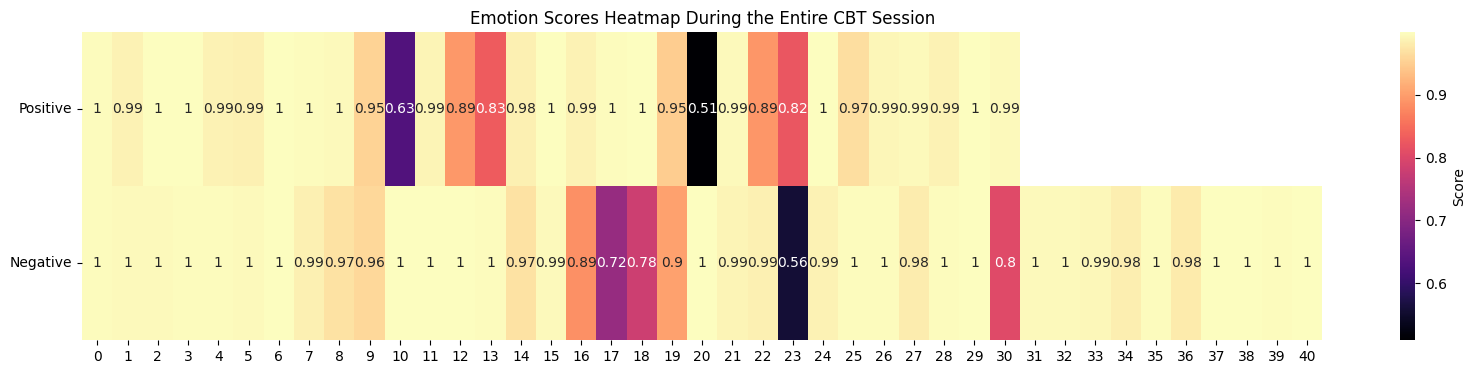

In [105]:
# 전체 데이터 
# DataFrame 생성
df = pd.DataFrame(result1)

# 레이블 별로 데이터 분류
positive_scores = df[df['label'] == 'POSITIVE']['score'].tolist()
negative_scores = df[df['label'] == 'NEGATIVE']['score'].tolist()

# 길이 조정을 위해 최대 길이 계산
max_length = max(len(positive_scores), len(negative_scores))

# 두 리스트를 같은 길이로 맞추기 (부족한 부분은 NaN으로 채움)
positive_scores.extend([np.nan] * (max_length - len(positive_scores)))
negative_scores.extend([np.nan] * (max_length - len(negative_scores)))

# 2차원 데이터 생성
heatmap_data = [positive_scores, negative_scores]

# 히트맵 생성
plt.figure(figsize=(20, 4))
sns.heatmap(heatmap_data, cmap='magma', annot=True, cbar_kws={'label': 'Score'})
plt.title('Emotion Scores Heatmap During the Entire CBT Session')
plt.yticks([0.5, 1.5], ['Positive', 'Negative'], rotation=0)
plt.show()


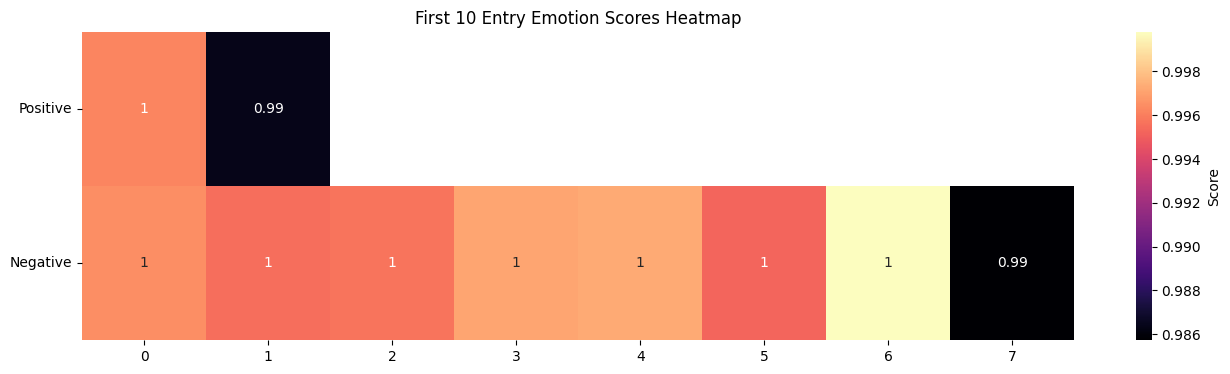

In [106]:
# 처음 10 엔트리 데이터 
# DataFrame 생성
df = first_entry_df

# 레이블 별로 데이터 분류
positive_scores = df[df['label'] == 'POSITIVE']['score'].tolist()
negative_scores = df[df['label'] == 'NEGATIVE']['score'].tolist()

# 길이 조정을 위해 최대 길이 계산
max_length = max(len(positive_scores), len(negative_scores))

# 두 리스트를 같은 길이로 맞추기 (부족한 부분은 NaN으로 채움)
positive_scores.extend([np.nan] * (max_length - len(positive_scores)))
negative_scores.extend([np.nan] * (max_length - len(negative_scores)))

# 2차원 데이터 생성
heatmap_data = [positive_scores, negative_scores]

# 히트맵 생성
plt.figure(figsize=(16, 4))
sns.heatmap(heatmap_data, cmap='magma', annot=True, cbar_kws={'label': 'Score'})
plt.title('First 10 Entry Emotion Scores Heatmap')
plt.yticks([0.5, 1.5], ['Positive', 'Negative'], rotation=0)
plt.show()

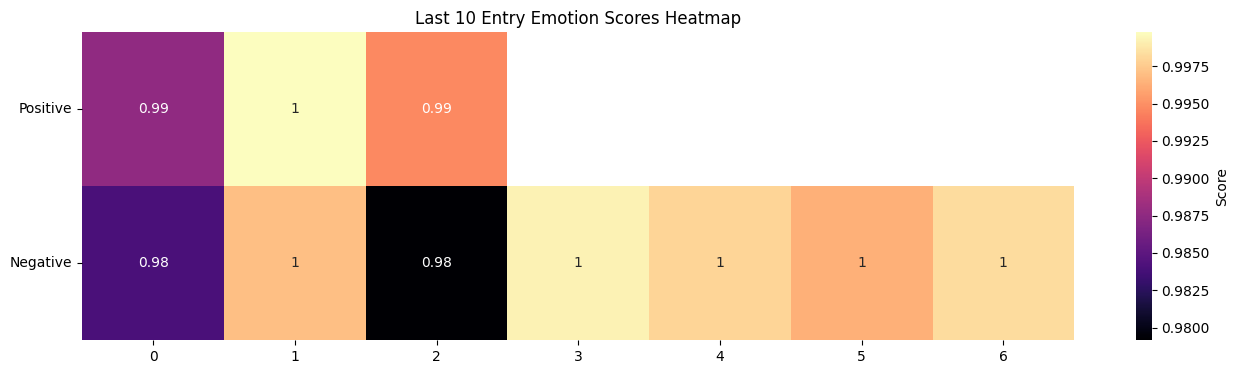

In [107]:
# 마지막 10 엔트리 데이터 
# DataFrame 생성
df = last_entry_df

# 레이블 별로 데이터 분류
positive_scores = df[df['label'] == 'POSITIVE']['score'].tolist()
negative_scores = df[df['label'] == 'NEGATIVE']['score'].tolist()

# 길이 조정을 위해 최대 길이 계산
max_length = max(len(positive_scores), len(negative_scores))

# 두 리스트를 같은 길이로 맞추기 (부족한 부분은 NaN으로 채움)
positive_scores.extend([np.nan] * (max_length - len(positive_scores)))
negative_scores.extend([np.nan] * (max_length - len(negative_scores)))

# 2차원 데이터 생성
heatmap_data = [positive_scores, negative_scores]

# 히트맵 생성
plt.figure(figsize=(16, 4))
sns.heatmap(heatmap_data, cmap='magma', annot=True, cbar_kws={'label': 'Score'})
plt.title('Last 10 Entry Emotion Scores Heatmap')
plt.yticks([0.5, 1.5], ['Positive', 'Negative'], rotation=0)
plt.show()
